In [1]:
import pandas as pd
import functions as f

### 1. Load Data

In [2]:
df91, df01 = f.load_data()

### 2. Process Data

In [3]:
pdf91 = f.process_data(df91, ['UniqueCarrier', 'Origin', 'Dest'],['Month','DayofMonth','DayOfWeek','DepTime','FlightNum','ActualElapsedTime','DepDelay','Distance','Cancelled','Diverted'], 'reg')

In [4]:
pdf01 = f.process_data(df01, ['UniqueCarrier','Origin', 'Dest'],['Month','DayofMonth','DayOfWeek','DepTime','FlightNum','ActualElapsedTime','DepDelay','Distance','TaxiIn','TaxiOut','Cancelled','Diverted'], 'reg')

### 3. Modeling

#### 3.1 Decision Tree

In [5]:
dt91, acc_dt91 = f.train_dt(pdf91,'reg')
dt01, acc_dt01 = f.train_dt(pdf01,'reg')

In [6]:
feature_names = dt91.feature_names_in_  # Replace with the attribute name holding your feature names
importance_scores = dt91.feature_importances_

# Creating a DataFrame to display feature importances
feature_importance_dt_91 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})

In [7]:
feature_names = dt01.feature_names_in_  # Replace with the attribute name holding your feature names
importance_scores = dt01.feature_importances_

# Creating a DataFrame to display feature importances
feature_importance_dt_01 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
})

#### 3.1 XG Boost

In [8]:
xgb91, acc_xgb91 = f.train_xgb(pdf91,'reg')
xgb01, acc_xgb01 = f.train_xgb(pdf01,'reg')

### 4. Results


#### 4.1 Accuracies

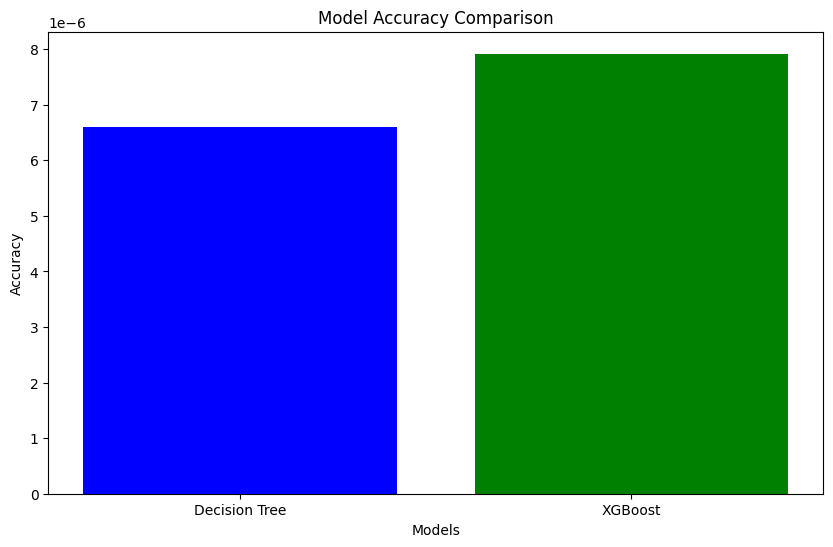

In [9]:
f.plot_model_accuracy([acc_dt91,acc_xgb91])

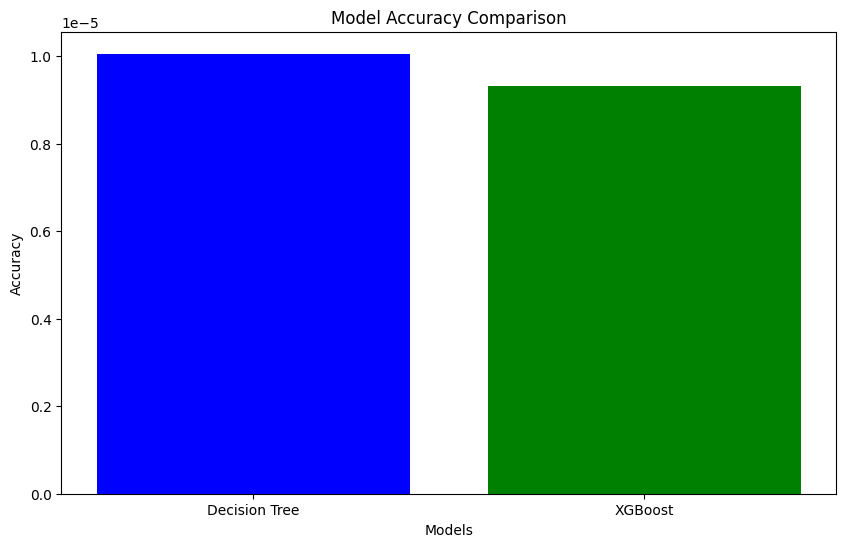

In [10]:
f.plot_model_accuracy([acc_dt01,acc_xgb01])

- Save Accuracies

In [11]:
pd.DataFrame({
    'Model': ['Decision Tree', 'XGBoost'],
    'Year 91': [acc_dt91, acc_xgb91],
    'Year 01': [acc_dt01, acc_xgb01]
}).to_csv('Data/accuracies_reg.csv',index=False)

#### 4.2 Feature Importance

In [12]:
dt_feature_importance_91 = f.feature_importance(dt91)

In [13]:
dt_feature_importance_91

,Feature,Importance
9,DepDelay,0.730274
8,ActualElapsedTime,0.090004
10,Distance,0.084403
1,Origin,0.019599
2,Dest,0.018741
6,DepTime,0.014837
7,FlightNum,0.012095
3,Month,0.011731
0,UniqueCarrier,0.011667
4,DayofMonth,0.004508


In [14]:
xgb_feature_importance_91 = f.feature_importance(xgb91)

In [15]:
xgb_feature_importance_91

,Feature,Importance
9,DepDelay,0.863148
8,ActualElapsedTime,0.035543
10,Distance,0.035529
1,Origin,0.011850
5,DayOfWeek,0.010804
0,UniqueCarrier,0.010160
6,DepTime,0.008750
2,Dest,0.007246
3,Month,0.006654
4,DayofMonth,0.005556


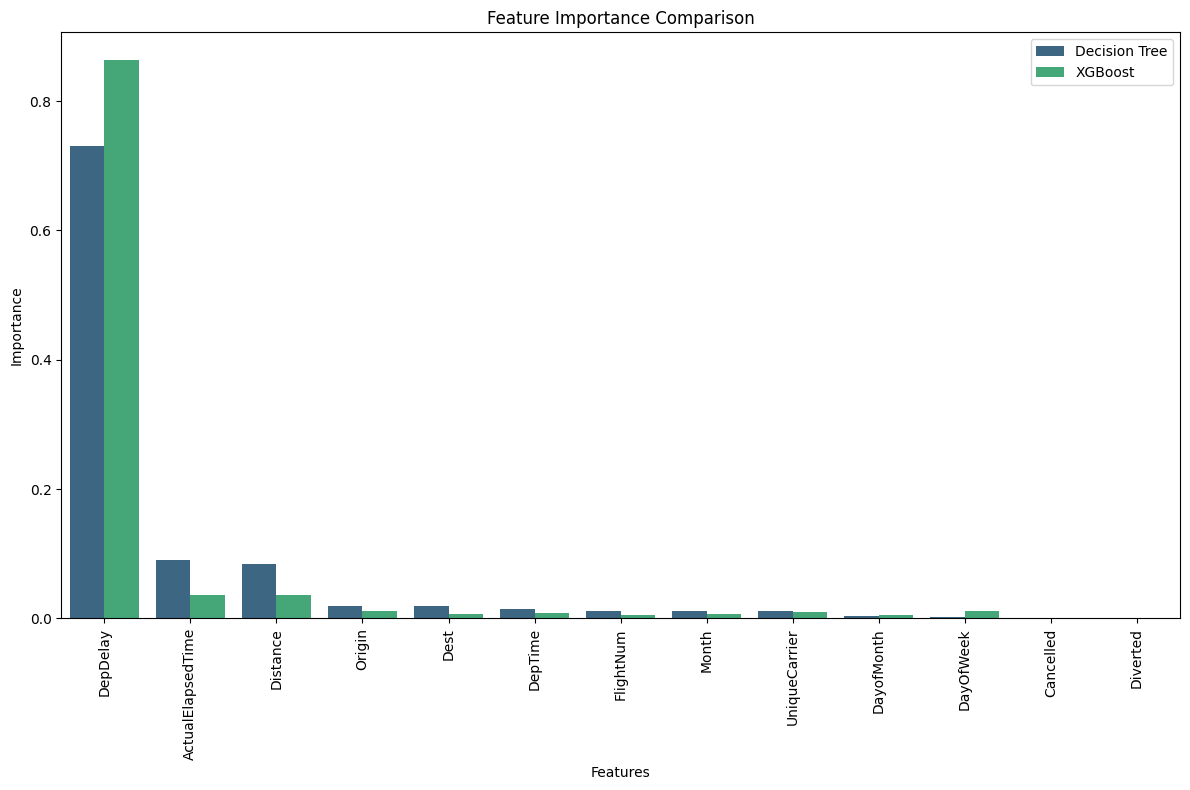

In [16]:
combined_feature_importance = f.combine_feature_importance_dfs(dt_feature_importance_91, xgb_feature_importance_91)

f.plot_feature_importance(combined_feature_importance)

In [17]:
combined_feature_importance.to_csv('Data/features_importance_reg_91.csv')

In [18]:
dt_feature_importance_01 = f.feature_importance(dt01)

In [19]:
xgb_feature_importance_01 = f.feature_importance(xgb01)

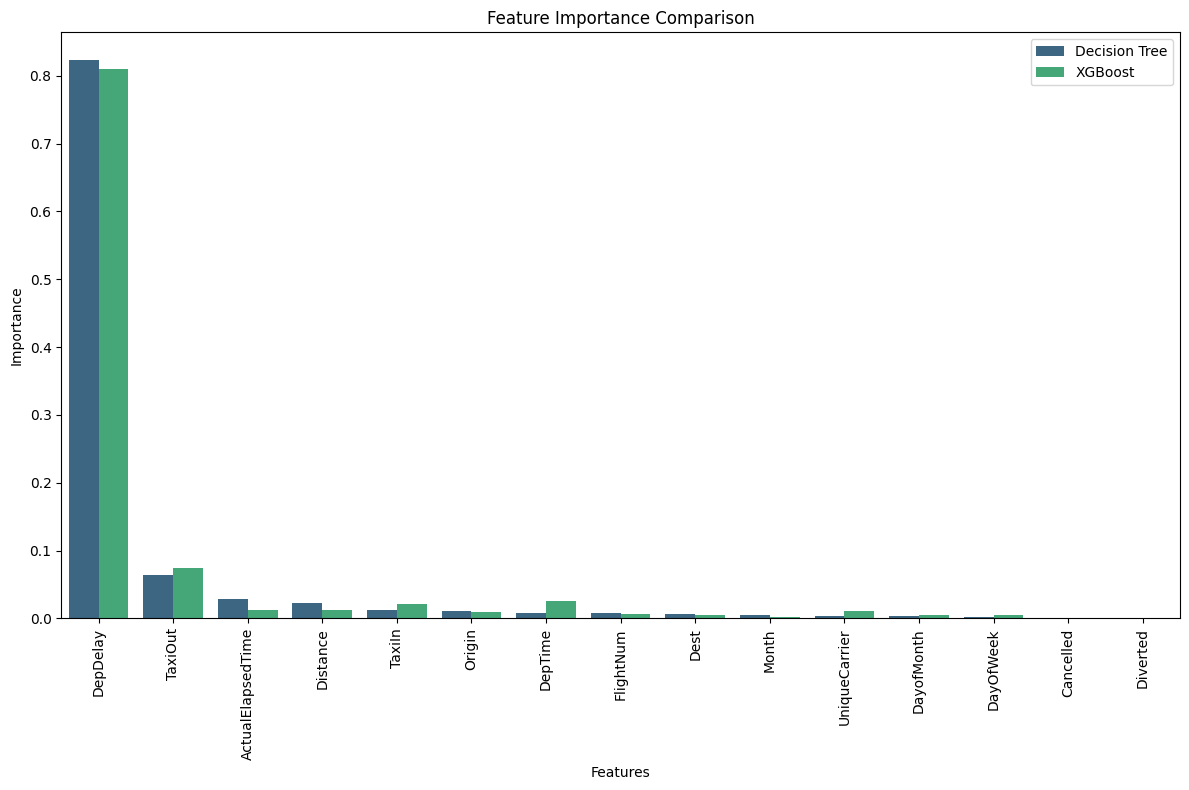

In [20]:
combined_feature_importance = f.combine_feature_importance_dfs(dt_feature_importance_01, xgb_feature_importance_01)

f.plot_feature_importance(combined_feature_importance)

In [21]:
combined_feature_importance.to_csv('Data/features_importance_reg_01.csv')